In [11]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [5]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

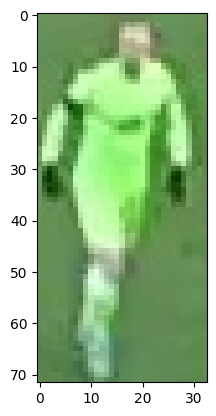

In [6]:
plt.imshow(image)
plt.show()

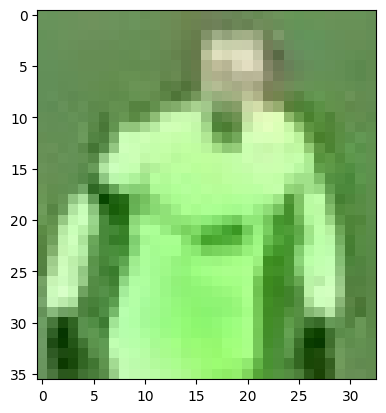

In [8]:
top_half_img = image[:int(image.shape[0]/2):]
plt.imshow(top_half_img)
plt.show()

#cluster the image into two

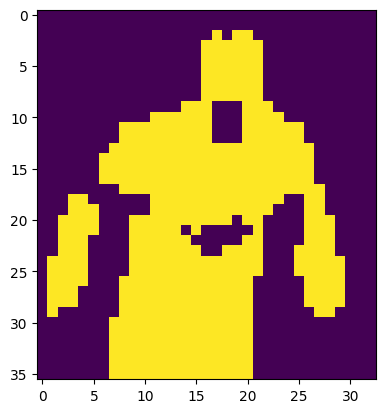

In [13]:
image_2d = top_half_img.reshape(-1,3)
kmeans = KMeans(n_clusters = 2,random_state=0)
kmeans.fit(image_2d)
labels = kmeans.labels_
cluster_image = labels.reshape(top_half_img.shape[0],top_half_img.shape[1])
plt.imshow(cluster_image)
plt.show()

In [14]:
corner_clusters = [cluster_image[0, 0], cluster_image[0, -1], cluster_image[-1, 0], cluster_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

0


In [15]:
player_cluser = 1 - non_player_cluster

In [21]:
kmeans.cluster_centers_[player_cluser]

array([172.88617886, 238.36382114, 147.56910569])

In [27]:
kmeans.predict(kmeans.cluster_centers_[player_cluser].reshape(1,-1))[0]

np.int32(1)